## Project-Classify Real or Fake JobPosting
The project is to predict whether the job posting is a real or fake posting using clasifier(logistic regression,naive baye).
This project helps from preventing the fraudness from cheaters about job posting.

### import the libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("fake_job_postings.csv")
data

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [3]:
#droping the unnecessary columns
data.drop(columns=['job_id','salary_range'],inplace=True,axis=1)

In [4]:
data.describe()

,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000
mean,0.042897,0.795302,0.491723,0.048434
std,0.202631,0.403492,0.499945,0.214688
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [5]:
#checking for no. of nan values in the each column in the data set
data.apply(lambda x:x.isnull().sum(),axis=0)

title                      0
location                 346
department             11547
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [6]:
#frequently-occurring element
data['location'].value_counts()

GB, LND, London               718
US, NY, New York              658
US, CA, San Francisco         472
GR, I, Athens                 464
US, ,                         339
                             ... 
US, CA, Montebello              1
RU, ,                           1
US, , East Peoria               1
GB, , Watford                   1
US, MI, South Haven/Covert      1
Name: location, Length: 3105, dtype: int64

In [7]:
#filling the null values with mode function(for location)
data['location'].fillna('GB, LND, London', inplace=True)

In [8]:
#frequently-occurring element
data['department'].value_counts()

Sales                               551
Engineering                         487
Marketing                           401
Operations                          270
IT                                  225
                                   ... 
Pawsitive Purrvention TV & Radio      1
Voxburner                             1
Garage                                1
Office Support                        1
reception                             1
Name: department, Length: 1337, dtype: int64

In [9]:
#filling the null values with mode function(for department)
data['department'].fillna('Sales',inplace=True)

In [10]:
data['company_profile'].value_counts()

We help teachers get safe &amp; secure jobs abroad :)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [11]:
data['company_profile'].fillna('We help teachers get safe &amp; secure jobs abroad :)',inplace=True)

In [12]:
data.apply(lambda x:x.isnull().sum(),axis=0)

title                     0
location                  0
department                0
company_profile           0
description               1
requirements           2695
benefits               7210
telecommuting             0
has_company_logo          0
has_questions             0
employment_type        3471
required_experience    7050
required_education     8105
industry               4903
function               6455
fraudulent                0
dtype: int64

In [13]:
data['description'].mode()

0    Play with kids, get paid for it Love travel? J...
dtype: object

In [14]:
data['description'].fillna(data['description'].mode()[0], inplace=True)

In [15]:
data['requirements'].value_counts()

University degree required. TEFL / TESOL / CELTA or teaching experience preferred but not necessaryCanada/US passport holders only                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [16]:
data['requirements'].fillna('University degree required. TEFL / TESOL / CELTA or teaching experience preferred but not necessaryCanada/US passport holders only',inplace=True)

In [17]:
data.apply(lambda x:x.isnull().sum(),axis=0)

title                     0
location                  0
department                0
company_profile           0
description               0
requirements              0
benefits               7210
telecommuting             0
has_company_logo          0
has_questions             0
employment_type        3471
required_experience    7050
required_education     8105
industry               4903
function               6455
fraudulent                0
dtype: int64

In [18]:
data['benefits'].value_counts()

See job description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [19]:
data['benefits'].fillna('See job description',inplace=True)

In [20]:
data['employment_type'].value_counts()

Full-time    11620
Contract      1524
Part-time      797
Temporary      241
Other          227
Name: employment_type, dtype: int64

In [21]:
data['employment_type'].fillna('Full-time',inplace=True)

In [22]:
data.apply(lambda x:x.isnull().sum(),axis=0)

title                     0
location                  0
department                0
company_profile           0
description               0
requirements              0
benefits                  0
telecommuting             0
has_company_logo          0
has_questions             0
employment_type           0
required_experience    7050
required_education     8105
industry               4903
function               6455
fraudulent                0
dtype: int64

In [23]:
data['required_experience'].value_counts()

Mid-Senior level    3809
Entry level         2697
Associate           2297
Not Applicable      1116
Director             389
Internship           381
Executive            141
Name: required_experience, dtype: int64

In [24]:
data['required_experience'].fillna('Mid-Senior level',inplace=True)

In [25]:
data['required_education'].fillna(data['required_education'].mode()[0],inplace=True)

In [26]:
data['industry'].value_counts()

Information Technology and Services    1734
Computer Software                      1376
Internet                               1062
Marketing and Advertising               828
Education Management                    822
                                       ... 
Museums and Institutions                  1
Sporting Goods                            1
Ranching                                  1
Alternative Dispute Resolution            1
Wine and Spirits                          1
Name: industry, Length: 131, dtype: int64

In [27]:
data['industry'].fillna('Information Technology and Services',inplace=True)

In [28]:
data['function'].value_counts()

Information Technology    1749
Sales                     1468
Engineering               1348
Customer Service          1229
Marketing                  830
Administrative             630
Design                     340
Health Care Provider       338
Other                      325
Education                  325
Management                 317
Business Development       228
Accounting/Auditing        212
Human Resources            205
Project Management         183
Finance                    172
Consulting                 144
Writing/Editing            132
Art/Creative               132
Production                 116
Product Management         114
Quality Assurance          111
Advertising                 90
Business Analyst            84
Data Analyst                82
Public Relations            76
Manufacturing               74
General Business            68
Research                    50
Legal                       47
Strategy/Planning           46
Training                    38
Supply C

In [29]:
data['function'].fillna('Information Technology',inplace=True)

In [30]:
data.apply(lambda x:x.isnull().sum(),axis=0)

title                  0
location               0
department             0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

## Exploratory Data Analysis
## Data visualization

0    17014
1      866
Name: fraudulent, dtype: int64

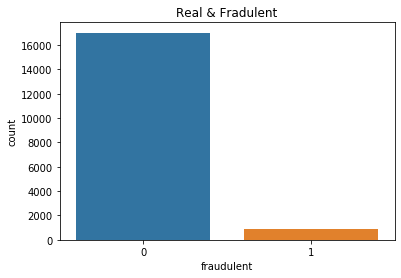

In [31]:
import seaborn as sns
sns.countplot(data.fraudulent).set_title('Real & Fradulent')
data['fraudulent'].value_counts()

Text(0.5, 0, 'required_education')

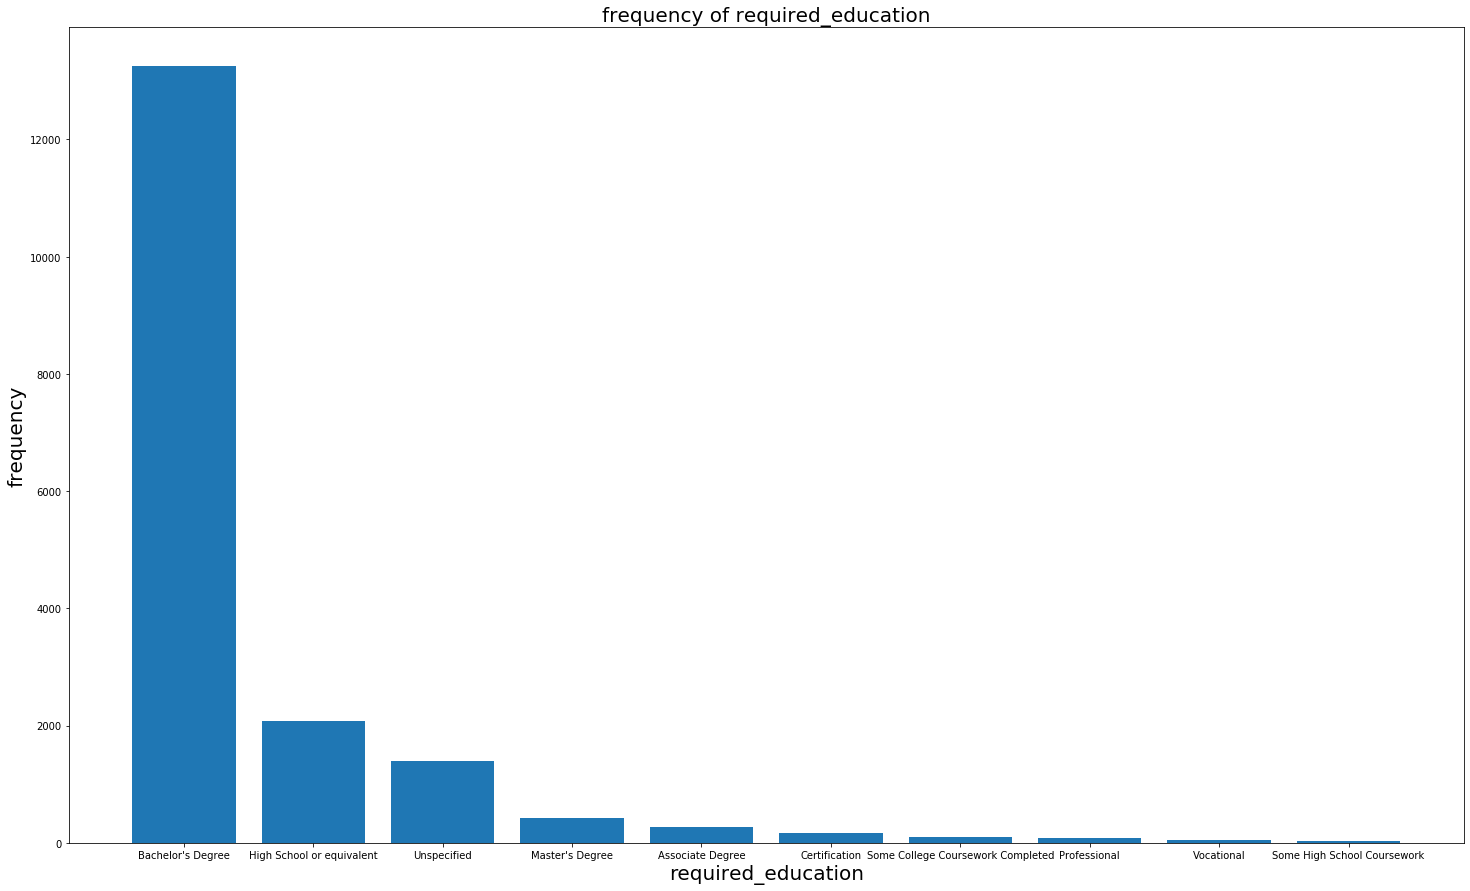

In [32]:
required_education  = dict(data.required_education.value_counts()[:10])
plt.figure(figsize=(25,15))
plt.title('frequency of required_education', size=20)
plt.bar(required_education.keys(), required_education.values())
plt.ylabel('frequency', size=20)
plt.xlabel('required_education', size=20)

Text(0.5, 0, 'employment_type')

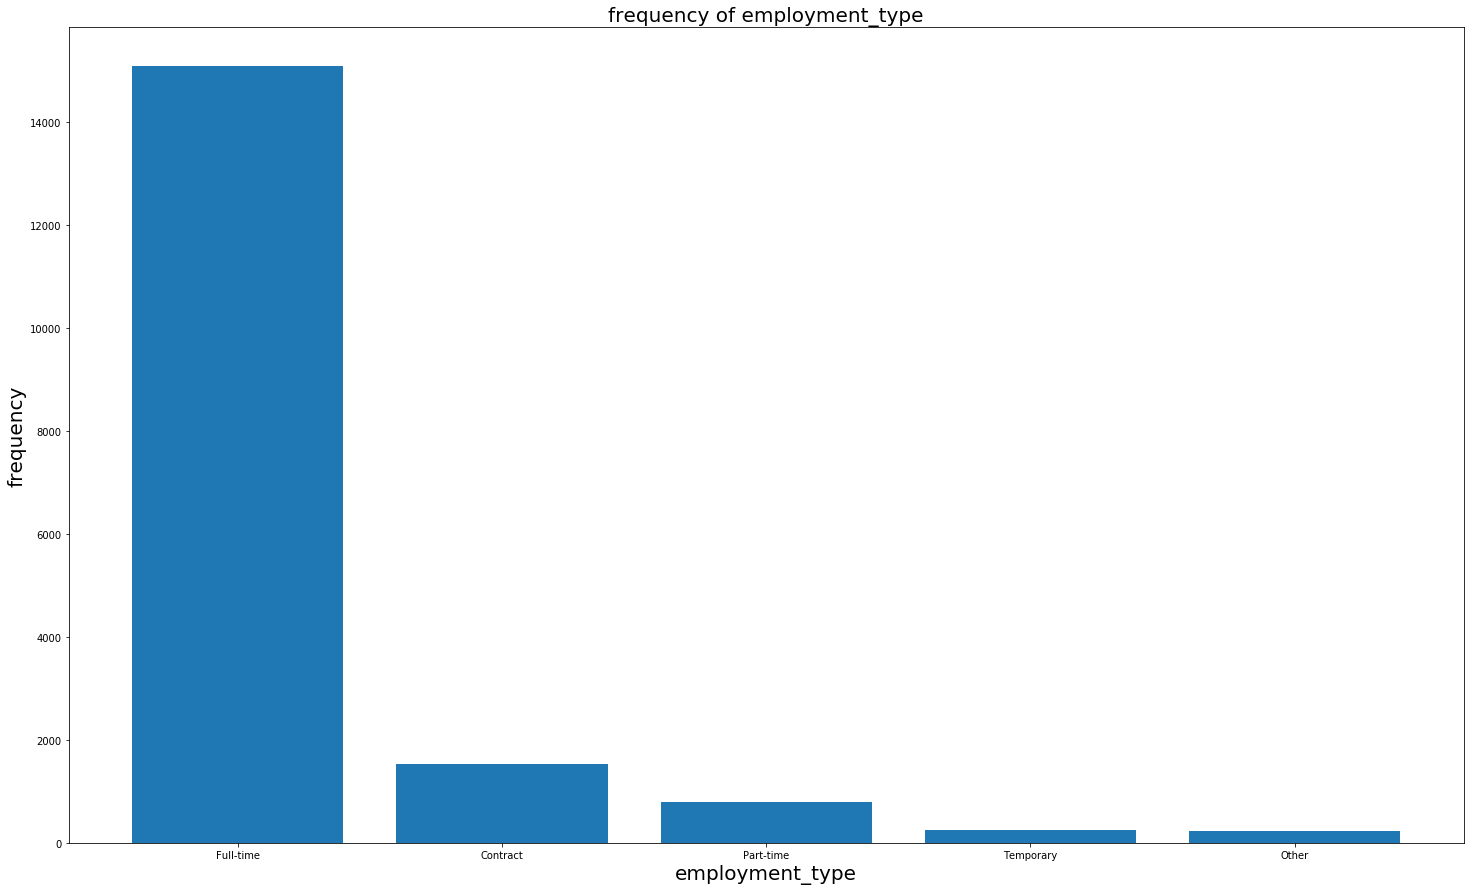

In [33]:
employment_type  = dict(data.employment_type.value_counts()[:11])
plt.figure(figsize=(25,15))
plt.title('frequency of employment_type', size=20)
plt.bar(employment_type.keys(), employment_type.values())
plt.ylabel('frequency', size=20)
plt.xlabel('employment_type', size=20)

Text(0.5, 0, 'required_experience')

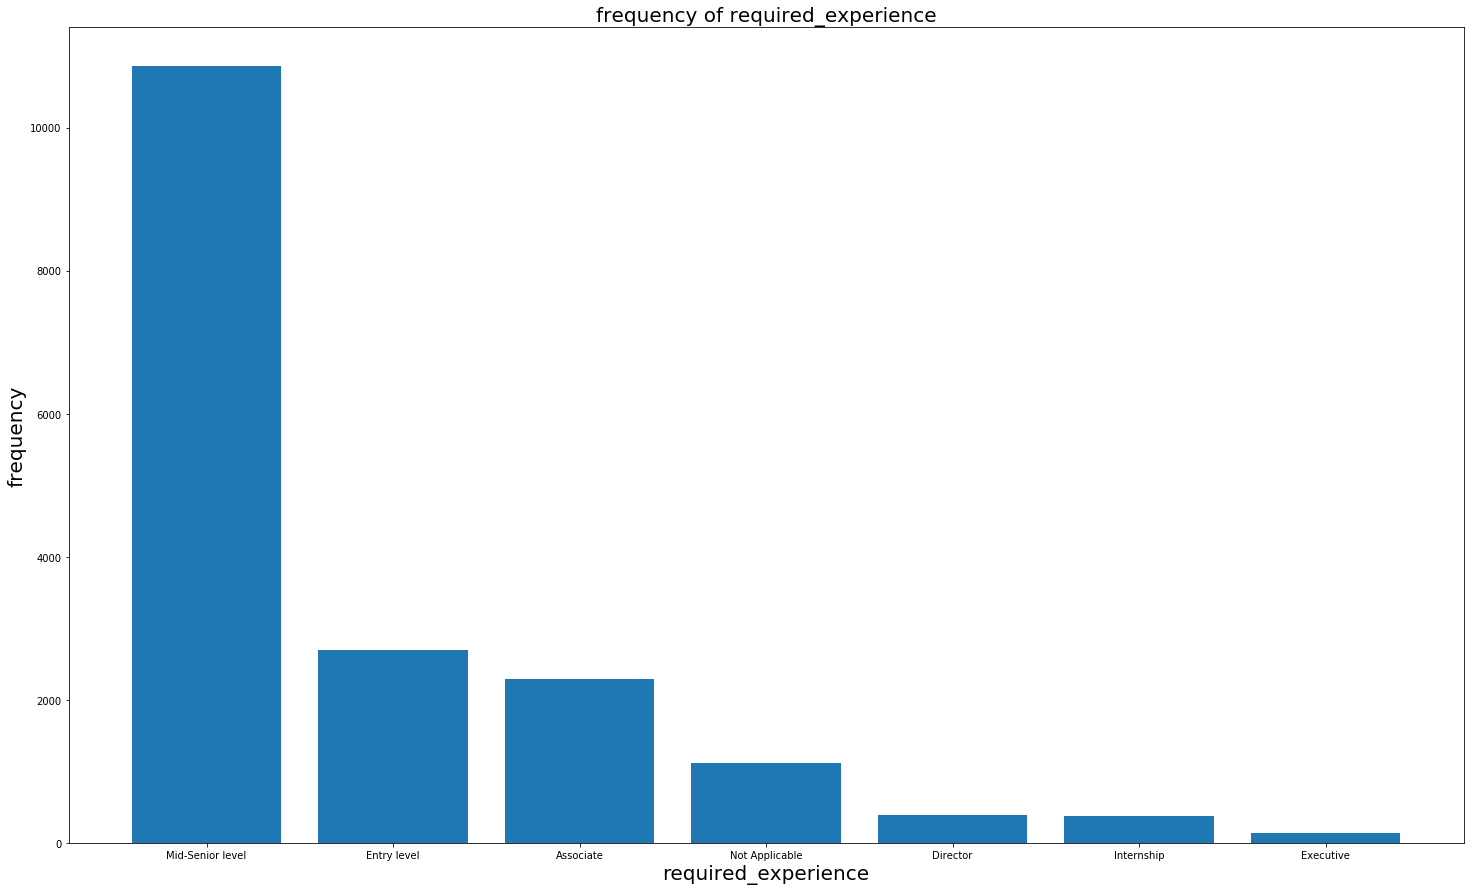

In [34]:
required_experience  = dict(data.required_experience.value_counts()[:11])
plt.figure(figsize=(25,15))
plt.title('frequency of required_experience', size=20)
plt.bar(required_experience.keys(), required_experience .values())
plt.ylabel('frequency', size=20)
plt.xlabel('required_experience', size=20)

Text(0.5, 0, 'function')

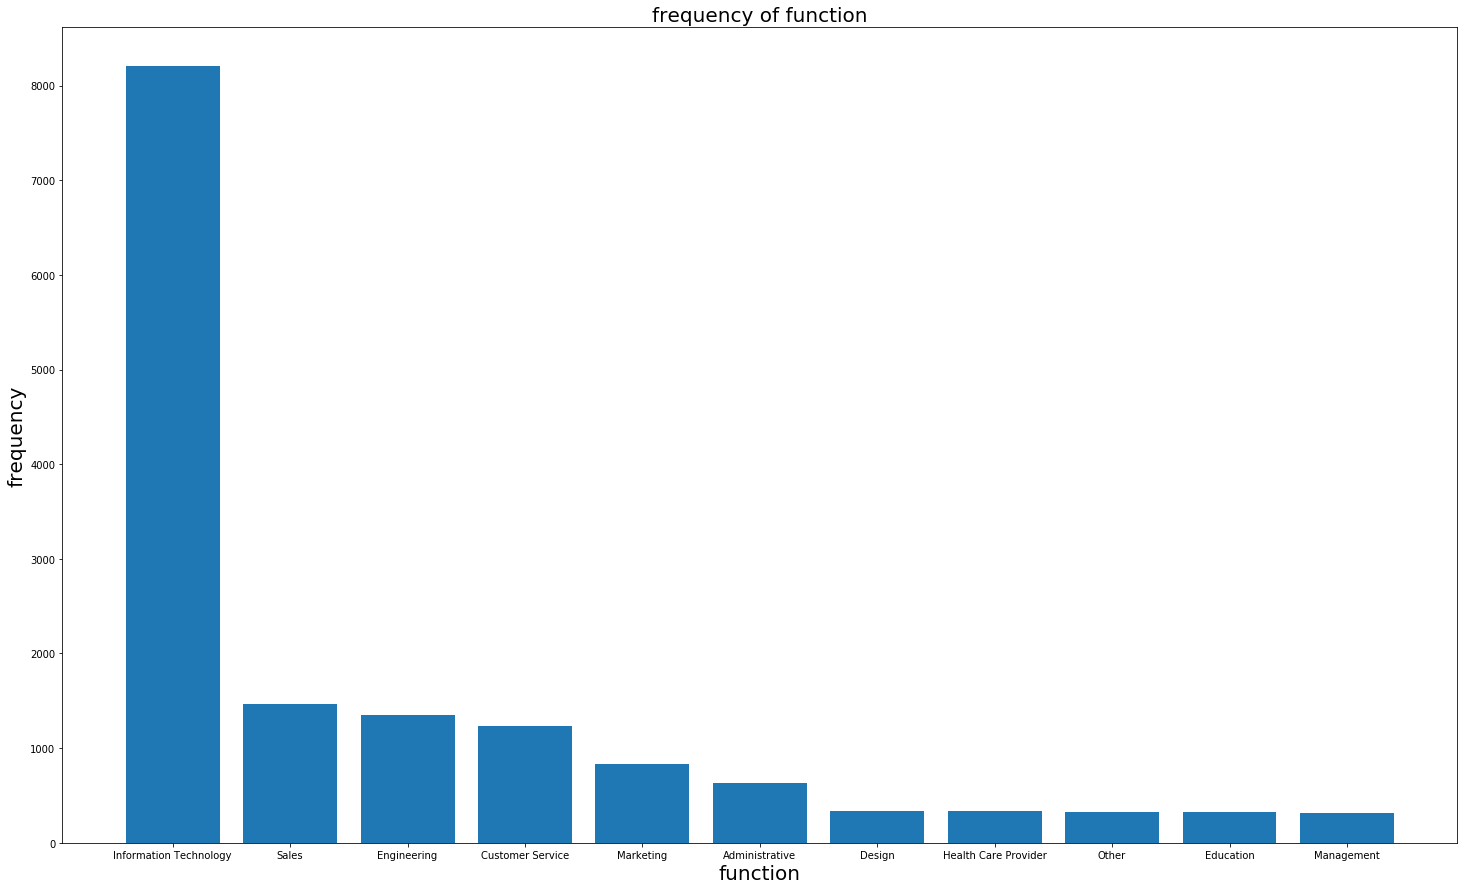

In [35]:
function = dict(data.function.value_counts()[:11])
plt.figure(figsize=(25,15))
plt.title('frequency of function', size=20)
plt.bar(function.keys(), function .values())
plt.ylabel('frequency', size=20)
plt.xlabel('function', size=20)

Text(0.5, 0, 'industry')

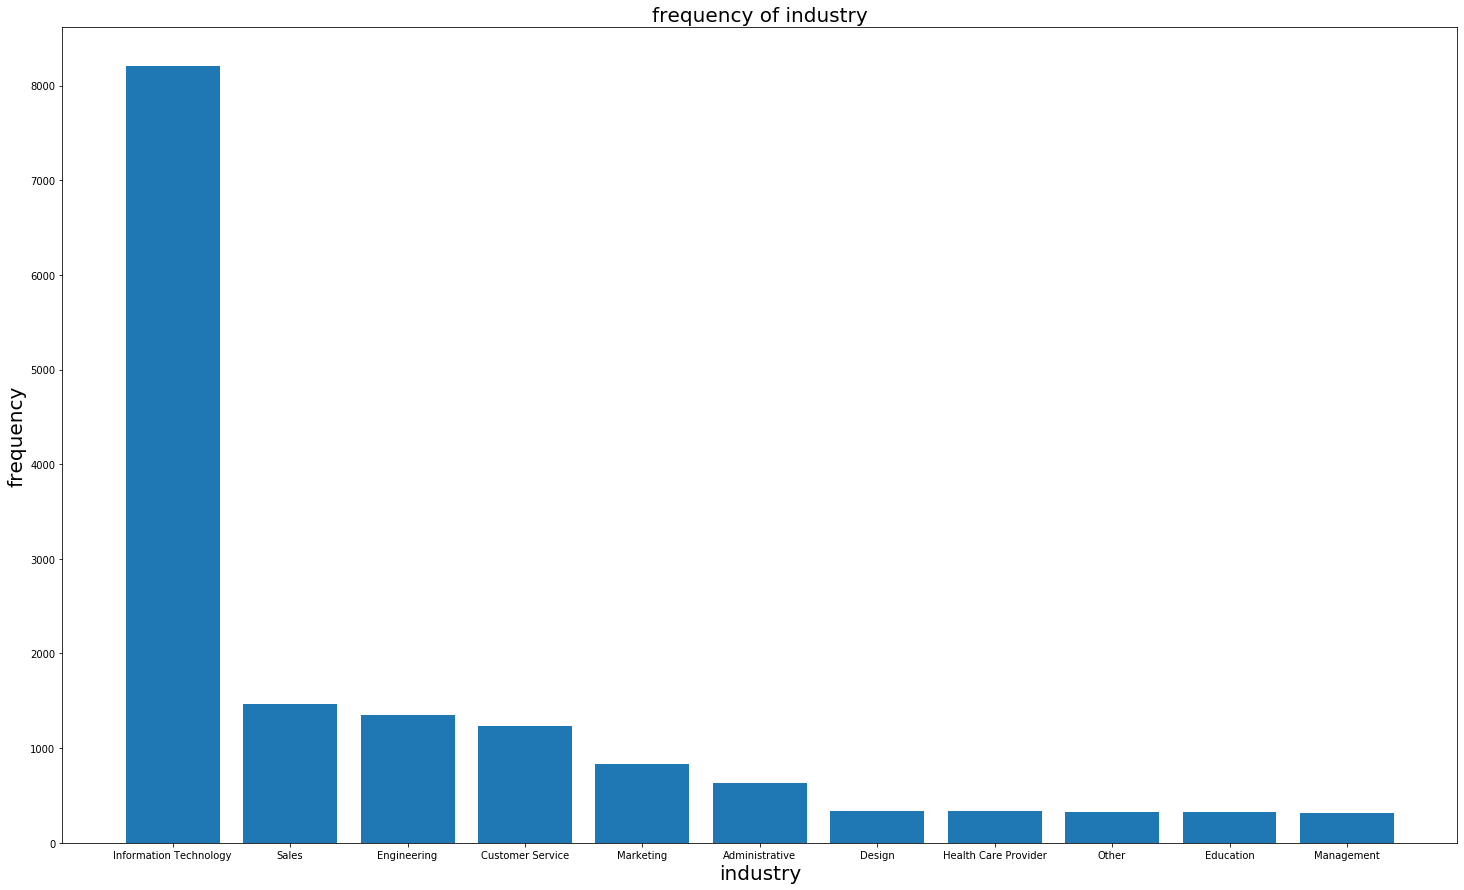

In [36]:
industry  = dict(data.industry.value_counts()[:11])
plt.figure(figsize=(25,15))
plt.title('frequency of industry', size=20)
plt.bar(function.keys(), function.values())
plt.ylabel('frequency', size=20)
plt.xlabel('industry', size=20)

0    9088
1    8792
Name: has_questions, dtype: int64

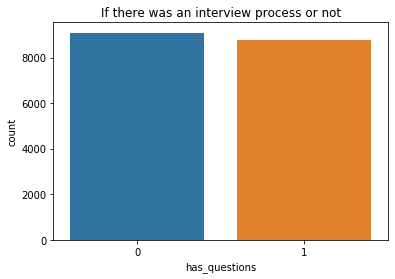

In [37]:
sns.countplot(data.has_questions).set_title('If there was an interview process or not')
data['has_questions'].value_counts()

0    17113
1      767
Name: telecommuting, dtype: int64

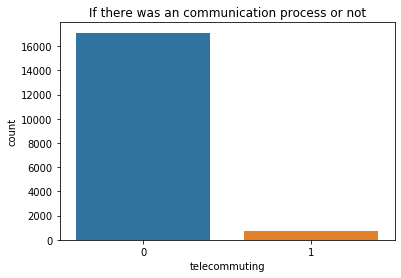

In [38]:
sns.countplot(data.telecommuting).set_title('If there was an communication process or not')
data['telecommuting'].value_counts()

1    14220
0     3660
Name: has_company_logo, dtype: int64

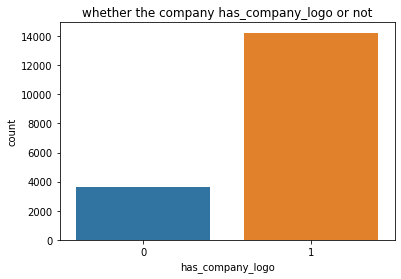

In [39]:
sns.countplot(data.has_company_logo).set_title('whether the company has_company_logo or not')
data['has_company_logo'].value_counts()

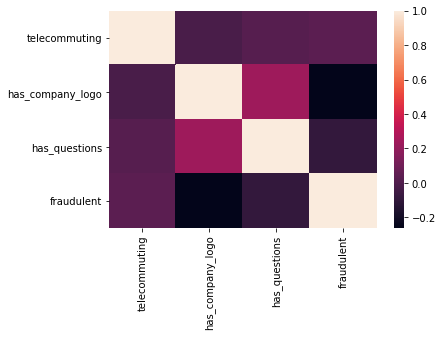

In [40]:
data.corr()
sns.heatmap(data.corr())

## Train_test_split

In [41]:
data.dtypes

title                  object
location               object
department             object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

In [42]:
data['job_description']=data['description'] + ' ' + data['location'] + ' ' + data['department'] + ' ' + data['company_profile'] + ' ' + data['description'] + ' ' + data['requirements'] + ' ' + data['benefits'] + ' ' + data['employment_type'] + ' ' + data['required_education'] + ' ' + data['industry'] + ' ' + data['function']+' '+data['title']

In [43]:
x = data['job_description']
y=data['fraudulent']

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [45]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(14304,)
(3576,)
(14304,)
(3576,)


In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()

In [47]:
x_train_transformed=tfidf.fit_transform(x_train)
x_train_transformed

<14304x93333 sparse matrix of type '<class 'numpy.float64'>'
	with 3172187 stored elements in Compressed Sparse Row format>

In [48]:
x_test_transformed=tfidf.transform(x_test)
x_test_transformed

<3576x93333 sparse matrix of type '<class 'numpy.float64'>'
	with 784269 stored elements in Compressed Sparse Row format>

In [49]:
tfidf.get_feature_names()

['00',
 '000',
 '0000',
 '0001pt',
 '0005',
 '000a',
 '000aed',
 '000applying',
 '000benefits',
 '000bonus',
 '000cash',
 '000commission',
 '000company',
 '000equity',
 '000full',
 '000gbp',
 '000generate',
 '000health',
 '000highly',
 '000hours',
 '000how',
 '000if',
 '000incentivised',
 '000k',
 '000location',
 '000medical',
 '000overview',
 '000plus',
 '000position',
 '000responsibilitiesyou',
 '000retailer',
 '000skill',
 '000term',
 '000type',
 '000uncapped',
 '000victor',
 '000working',
 '001',
 '001ba',
 '002pm',
 '003',
 '004contact',
 '005',
 '00592duration',
 '006',
 '0062834',
 '0062953',
 '008',
 '00a',
 '00am',
 '00benefits',
 '00commission',
 '00duration',
 '00pay',
 '00pdental',
 '00please',
 '00pm',
 '00pmcomfortable',
 '00pmfriday',
 '00pmjoin',
 '00pmlocation',
 '00pmmust',
 '00pmoverall',
 '00pmsaturday',
 '00pmstarting',
 '00pmsunday',
 '00pmtechnical',
 '00pmthursday',
 '00pmwednesday',
 '00pmweekend',
 '00pmwhere',
 '00ppay',
 '00salary',
 '00saturdays',
 '00start

In [50]:
tfidf.vocabulary_

{'the': 80803,
 'job': 41745,
 'is': 40917,
 'to': 81720,
 'support': 77702,
 'growth': 35070,
 'of': 52479,
 'url_9f35c886234b8e939f5403fd12ad24821ba485aee59d1581c7a35be587faa504': 85382,
 'marketplace': 46986,
 'project': 62334,
 'this': 81126,
 'will': 88761,
 'involve': 40732,
 'liaison': 44231,
 'with': 88935,
 'vendors': 86783,
 'administration': 3334,
 'website': 88198,
 'designers': 21735,
 'interfacing': 40260,
 'between': 9736,
 'accounts': 2540,
 'and': 5094,
 'clients': 14468,
 'generally': 33875,
 'troubleshooting': 83074,
 'various': 86656,
 'systems': 78296,
 'involved': 40733,
 'in': 38301,
 'running': 69312,
 'an': 4804,
 'internet': 40334,
 'successful': 77188,
 'candidate': 12220,
 'be': 9126,
 'someone': 74430,
 'who': 88664,
 'interesting': 40202,
 'marketing': 46850,
 'would': 89572,
 'like': 44462,
 'grow': 35036,
 'into': 40504,
 'bigger': 9842,
 'role': 68803,
 'within': 88962,
 'company': 15948,
 'gb': 33751,
 'war': 87853,
 'coventry': 18326,
 'renewable': 65

In [51]:
tfidf.idf_

array([4.67396157, 3.44469162, 9.87521722, ..., 9.87521722, 8.95892649,
       9.87521722])

## Apply the naive Bayes Algorithm

In [52]:
# Apply the naive Bayes Algorithm
# Import BernNB
from sklearn.naive_bayes import BernoulliNB
# creating an object for BerNB
model_BernNB = BernoulliNB()

In [53]:
# Applying the algorithm to the data
# objectName.fit(Input,Output)
model_BernNB.fit(x_train_transformed, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [54]:
y_train_pred = model_BernNB.predict(x_train_transformed)

In [55]:
# compare the actual values(y_test) with predicted values(y_test_pred)
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_train,y_train_pred)

array([[13538,    74],
       [  480,   212]], dtype=int64)

In [56]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     13612
           1       0.74      0.31      0.43       692

    accuracy                           0.96     14304
   macro avg       0.85      0.65      0.71     14304
weighted avg       0.95      0.96      0.95     14304



In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)

0.9612695749440716

In [58]:
from sklearn.metrics import  precision_score
precision_score(y_train,y_train_pred)

0.7412587412587412

In [59]:
from sklearn.metrics import recall_score
recall_score(y_train,y_train_pred)

0.3063583815028902

In [60]:
# Applying the algorithm to the data
# objectName.fit(Input,Output)
model_BernNB.fit(x_test_transformed, y_test)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [61]:
y_test_pred = model_BernNB.predict(x_test_transformed)

In [62]:
# compare the actual values(y_test) with predicted values(y_test_pred)
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,y_test_pred)

array([[3402,    0],
       [ 173,    1]], dtype=int64)

In [63]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      3402
           1       1.00      0.01      0.01       174

    accuracy                           0.95      3576
   macro avg       0.98      0.50      0.49      3576
weighted avg       0.95      0.95      0.93      3576



In [64]:
from sklearn.metrics import accuracy_score
accu_naive=accuracy_score(y_test,y_test_pred)
accu_naive

0.9516219239373602

In [65]:
from sklearn.metrics import  precision_score
prec_naive=precision_score(y_test,y_test_pred)
prec_naive

1.0

In [66]:
from sklearn.metrics import recall_score
recall_score(y_test,y_test_pred)

0.005747126436781609

## logistic regression

In [67]:
## Import Logistic Regression
from sklearn.linear_model import LogisticRegression
# creating an object for Logistic Regression
Lr=LogisticRegression()

In [68]:
Lr.fit(x_train_transformed, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
y_train_pred = Lr.predict(x_train_transformed)

In [70]:
# compare the actual values(y_test) with predicted values(y_test_pred)
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_train,y_train_pred)

array([[13611,     1],
       [  419,   273]], dtype=int64)

In [71]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     13612
           1       1.00      0.39      0.57       692

    accuracy                           0.97     14304
   macro avg       0.98      0.70      0.78     14304
weighted avg       0.97      0.97      0.96     14304



In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)

0.9706375838926175

In [73]:
from sklearn.metrics import  precision_score
precision_score(y_train,y_train_pred)

0.9963503649635036

In [74]:
from sklearn.metrics import recall_score
recall_score(y_train,y_train_pred)

0.3945086705202312

In [75]:
Lr.fit(x_test_transformed, y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
y_test_pred = Lr.predict(x_test_transformed)

In [77]:
# compare the actual values(y_test) with predicted values(y_test_pred)
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,y_test_pred)

array([[3402,    0],
       [ 148,   26]], dtype=int64)

In [78]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3402
           1       1.00      0.15      0.26       174

    accuracy                           0.96      3576
   macro avg       0.98      0.57      0.62      3576
weighted avg       0.96      0.96      0.94      3576



In [79]:
from sklearn.metrics import accuracy_score
accu_log=accuracy_score(y_test,y_test_pred)
accu_log

0.9586129753914989

In [80]:
from sklearn.metrics import  precision_score
prec_log=precision_score(y_test,y_test_pred)
prec_log

1.0

In [81]:
from sklearn.metrics import recall_score
recall_score(y_test,y_test_pred)

0.14942528735632185

## comparing the Accuracy scores

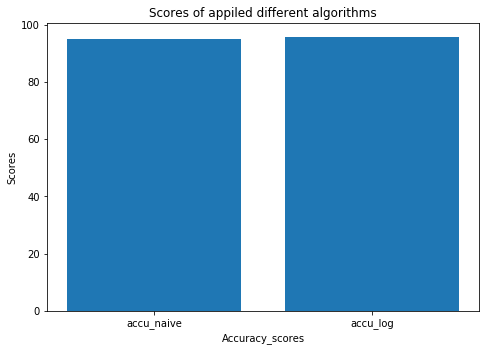

In [82]:
accuracy_names=['accu_naive','accu_log']
accuracy_values=[95.1,95.8]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(accuracy_names,accuracy_values)
ax.set_xlabel('Accuracy_scores')
ax.set_ylabel('Scores')
ax.set_title('Scores of appiled different algorithms')
plt.show()

## comparing the precison scores

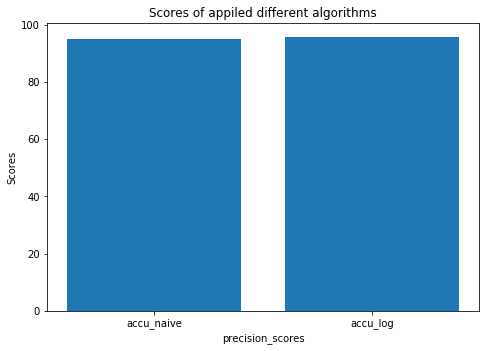

In [83]:
precision_names=['prec_naive','prec_log']
precision_values=[1.00,1.00]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(accuracy_names,accuracy_values)
ax.set_xlabel('precision_scores')
ax.set_ylabel('Scores')
ax.set_title('Scores of appiled different algorithms')
plt.show()

## Grid search cv
Applying Grid search cv for logistic regression because it have the the highest accuracy

In [84]:
from sklearn.model_selection import GridSearchCV
dual=[False]
max_iter=[100]
param_grid = dict(dual=dual,max_iter=max_iter)

In [85]:
import time

Lr = LogisticRegression(dual=False)
grid = GridSearchCV(estimator=Lr, param_grid=param_grid, cv = 3, n_jobs=-1)

start_time = time.time()
grid_result = grid.fit(x_train_transformed, y_train)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.964346 using {'dual': False, 'max_iter': 100}
Execution time: 5.703684091567993 ms


In [86]:
grid_result.best_params_

{'dual': False, 'max_iter': 100}

In [87]:
Lr = LogisticRegression(dual = False, max_iter = 100)

# We need to fit the model to the data
Lr.fit(x_train_transformed, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
# Prediction on test data
pred_test = Lr.predict(x_test_transformed)

#Classification Report of actual values and predicted value(GridSearch)
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3402
           1       0.99      0.40      0.57       174

    accuracy                           0.97      3576
   macro avg       0.98      0.70      0.78      3576
weighted avg       0.97      0.97      0.96      3576



In [89]:
Lr_score = (Lr.score(x_test_transformed, pred_test))*100
Lr_score

100.0

In [90]:
param_grid = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],}

In [91]:
#Import the GridSearchCV 
from sklearn.model_selection import GridSearchCV

# initialization of GridSearch with the parameters- ModelName and the dictionary of parameters
model_BernNB = BernoulliNB()
grid_search = GridSearchCV(BernoulliNB(), param_grid=param_grid, n_jobs=-1, cv=5, verbose=5)

# applying gridsearch onto dataset
grid_search.fit(x_train_transformed, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  16 out of  25 | elapsed:    2.5s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  22 out of  25 | elapsed:    3.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    3.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None,
                                   fit_prior=True),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=5)

In [92]:
grid_result.best_params_

{'dual': False, 'max_iter': 100}

In [93]:
model_BernNB = BernoulliNB()

# We need to fit the model to the data
model_BernNB.fit(x_train_transformed, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [94]:
pred_test = model_BernNB.predict(x_test_transformed)

In [95]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3402
           1       0.85      0.22      0.35       174

    accuracy                           0.96      3576
   macro avg       0.90      0.61      0.67      3576
weighted avg       0.96      0.96      0.95      3576



In [97]:
naive_score = (model_BernNB.score(x_test_transformed, pred_test))*100
naive_score

100.0

Text(0, 0.5, 'Accuracy')

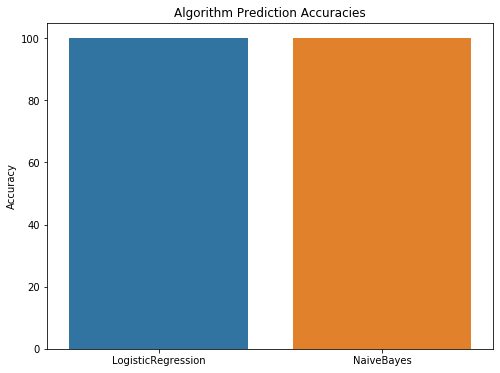

In [98]:
Methods = ['LogisticRegression', 'NaiveBayes']
Scores = np.array([Lr_score,naive_score])

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(Methods, Scores)
plt.title('Algorithm Prediction Accuracies')
plt.ylabel('Accuracy')